<h2> Objective:- Task 4P: Working with pandas Data Frames (Heterogeneous Data) </h2>

<div style="text-align: right"> Done by: <b>Karan Murjani </b> </div>

### Intro : The standard Python library pandas is one of the most popular libraries used for data analysis and manipulation. Pandas is used to convert data into a structured format known as a DataFrame that can be used for a wide variety of operations and analytics. All the manipulation with data is done using pandas functions. This task was done using all the pandas function available.

In [1]:
#Dependency

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt 
from datetime import timedelta
warnings.filterwarnings('ignore') 

#### 1. Convert all columns so that they use metric (International System of Units, SI) or derived units: temp and dewp to Celsius, precip to millimetres, visib to kilometres, as well as wind_speed and wind_gust to km/h. Replace the data in-place (overwrite existing columns with new ones).

In [2]:
#Reading dataset
nyc_weather_df = pd.read_csv('nycflights13_weather.csv')
print(nyc_weather_df.shape)
nyc_weather_df.head()

(26130, 15)


,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,01/01/13 1:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,01/01/13 2:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,01/01/13 3:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,01/01/13 4:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,01/01/13 5:00


In [3]:
#Converting 'temp' and 'dewp' columns from Fahrenheit to degree Celsius
nyc_weather_df['temp'] = (nyc_weather_df['temp'] - 32) * 5/9
nyc_weather_df['dewp'] = (nyc_weather_df['dewp'] - 32) * 5/9

#Converting inches into mm
nyc_weather_df['precip'] = (nyc_weather_df['precip'] * 25.4)

#Converting miles to kms
nyc_weather_df['visib'] = (nyc_weather_df['visib'] * 1.609)
nyc_weather_df['wind_speed'] = (nyc_weather_df['wind_speed'] * 1.609)
nyc_weather_df['wind_gust'] = (nyc_weather_df['wind_gust'] * 1.609)

#### 2. Convert the time_hour column (in-place) to the datetime64 type and then subtract one hour so that data match the information stored in the month, day, and hour fields.

In [4]:
#Checking the data type of all the columns
nyc_weather_df.dtypes

origin         object
year            int64
month           int64
day             int64
hour            int64
temp          float64
dewp          float64
humid         float64
wind_dir      float64
wind_speed    float64
wind_gust     float64
precip        float64
pressure      float64
visib         float64
time_hour      object
dtype: object

In [5]:
#Converting 'time_hour' column from object datatype to datetime64 type
nyc_weather_df['time_hour'] = pd.to_datetime(nyc_weather_df['time_hour'])

#Subtracting 1 hour from each row to match the month, day and hour columns with the time_hour column
nyc_weather_df['time_hour'] = nyc_weather_df['time_hour'] - timedelta(hours = 1)

In [6]:
#Checking the data type after conversion
nyc_weather_df.dtypes

origin                object
year                   int64
month                  int64
day                    int64
hour                   int64
temp                 float64
dewp                 float64
humid                float64
wind_dir             float64
wind_speed           float64
wind_gust            float64
precip               float64
pressure             float64
visib                float64
time_hour     datetime64[ns]
dtype: object

#### 3. Compute daily mean temperatures (360+ average temperatures for each day separately) for the JFK airport with missing hourly temperature measurements ignored (removed) whatsoever (e.g., mean of [10, NaN, 20] is simply 15).

In [7]:
#Filtering null values and checking the number of null values
jfk_origin_df = nyc_weather_df.query('origin=="JFK"')
jfk_origin_df['temp'].isnull().sum()

0

In [8]:
#Calculating average values
avg_daily_temp_jfk = round(jfk_origin_df.groupby(['year', 'month','day'])['temp'].mean(), 2).reset_index()
avg_daily_temp_jfk['date'] = avg_daily_temp_jfk[["year", "month","day"]].apply(lambda x: '-'.join(x.values.astype(str)), axis = "columns")
avg_daily_temp_jfk['date'] = pd.to_datetime(avg_daily_temp_jfk['date'])

#### 4 Present the daily mean temperatures (360+ data points) in a single plot. The x-axis labels should be human-readable and intuitive (e.g., month names).

Text(0, 0.5, 'Daily mean temperature')

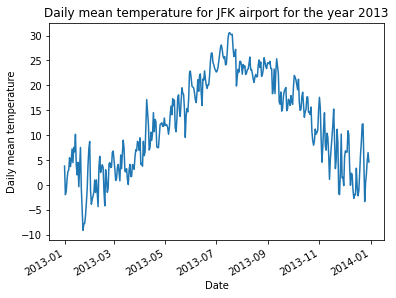

In [9]:
#Plotting the time series of given dataframe
plt.plot(avg_daily_temp_jfk.date, avg_daily_temp_jfk.temp)
plt.title('Daily mean temperature for JFK airport for the year 2013')
plt.xticks(rotation = 30, ha = 'right')

#Providing x and y label to the chart
plt.xlabel('Date')
plt.ylabel('Daily mean temperature')

#### 5. Find the five hottest days.

In [10]:
avg_daily_temp_jfk.nlargest(5, 'temp')

,year,month,day,temp,date
197,2013,7,17,30.58,2013-07-17
196,2013,7,16,30.48,2013-07-16
200,2013,7,20,30.25,2013-07-20
198,2013,7,18,30.24,2013-07-18
199,2013,7,19,30.19,2013-07-19


### 5.3 Task 2

### Task 2.1 Compute the daily mean temperatures also for the EWR and LGA airports.

In [11]:
#Removing null value record 
jfk_origin_df = nyc_weather_df.query('origin=="JFK"')
jfk_origin_df = jfk_origin_df[~jfk_origin_df['temp'].isnull()]
jfk_origin_df['temp'].isnull().sum()

0

In [12]:
#Calculating average values
avg_daily_temp_ewr = round(jfk_origin_df.groupby(['year', 'month','day'])['temp'].mean(), 2).reset_index()
avg_daily_temp_ewr['date'] = avg_daily_temp_ewr[["year", "month","day"]].apply(lambda x: '-'.join(x.values.astype(str)), axis = "columns")
avg_daily_temp_ewr['date'] = pd.to_datetime(avg_daily_temp_ewr['date'])

In [13]:
#Removing null value record 
lga_origin_df = nyc_weather_df.query('origin=="LGA"')
lga_origin_df = lga_origin_df[~lga_origin_df['temp'].isnull()]
lga_origin_df['temp'].isnull().sum()

0

In [14]:
#Calculating average values
avg_daily_temp_lga = round(lga_origin_df.groupby(['year', 'month','day'])['temp'].mean(), 2).reset_index()
avg_daily_temp_lga['date'] = avg_daily_temp_lga[["year", "month","day"]].apply(lambda x: '-'.join(x.values.astype(str)), axis = "columns")
avg_daily_temp_lga['date'] = pd.to_datetime(avg_daily_temp_lga['date'])

### Task 2.2 Draw the daily mean temperatures for the 3 airports in the same plot (three curves of different colours). Add a readable legend.

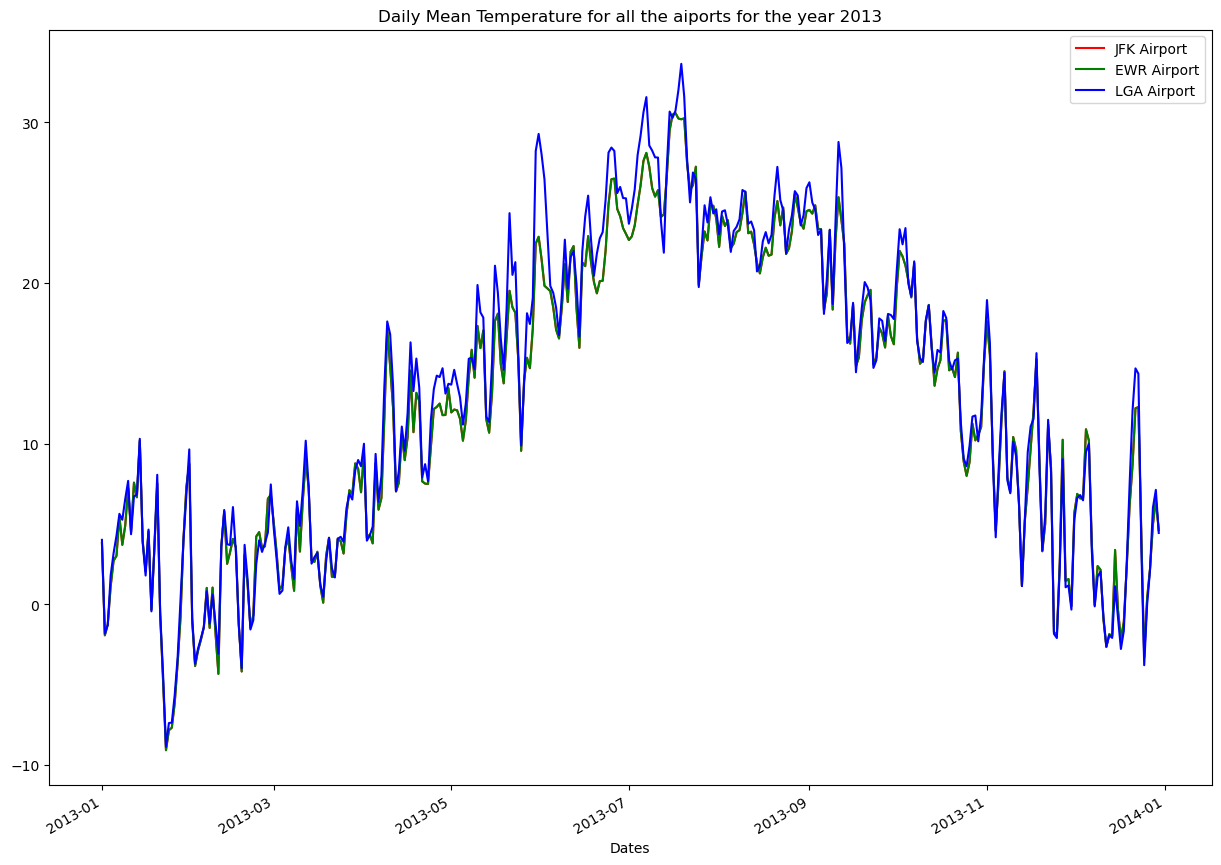

In [15]:
plt.figure(figsize = (15, 10), dpi = 100)
plt.plot(avg_daily_temp_jfk.date, avg_daily_temp_jfk.temp, label ='JFK Airport', color = 'red')
plt.plot(avg_daily_temp_ewr.date, avg_daily_temp_ewr.temp, label ='EWR Airport', color = 'green')
plt.plot(avg_daily_temp_lga.date, avg_daily_temp_lga.temp, label ='LGA Airport', color = 'blue')

#Rotating the x-axis tick labels at 30degree towards right
plt.xticks(rotation = 30, ha = 'right') 
plt.title('Daily Mean Temperature for all the aiports for the year 2013')
plt.xlabel('Dates')

#Adding legend to the curve
plt.legend()

### Conclusion - 

This task was performed for data manipulation on weather data. It handled all the SI unit changes required in each columns and then also change the data type for datetime column. It was also performed to filter few records in the data for calculating average values and then plot those daily mean temperatures.